### This file combines tweets with emojis and the emoji sentiment analysis from Noval et al. (2015).

In [1]:
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import groupby, islice

In [53]:
emoji_ranking = pd.read_csv('emoji_sentiment.csv',encoding = 'utf-8')

In [54]:
print(emoji_ranking.shape)
emoji_ranking.head()

(969, 9)


,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


In [55]:
# switch to utf8-encoding
def emoji_utf8(text):
    return f'0x{ord(text):X}'
emoji_ranking['emoji'] = [emoji_utf8(i) for i in emoji_ranking['Emoji']]

In [56]:
emoji_ranking['Emoji'] = [emoji.demojize(i) for i in emoji_ranking['Emoji']]


In [57]:
emoji_ranking = emoji_ranking.rename(columns={"Unicode codepoint": "encode"})

In [58]:
emoji_ranking['Sum'] = [emoji_ranking.Negative[i] + emoji_ranking.Neutral[i] + emoji_ranking.Positive[i] for i in range(len(emoji_ranking))]

emoji_ranking['Neg_percent'] =  [emoji_ranking.Negative[i]/emoji_ranking.Sum[i] for i in range(len(emoji_ranking))] 
emoji_ranking['Neu_percent'] =  [emoji_ranking.Neutral[i]/emoji_ranking.Sum[i] for i in range(len(emoji_ranking))] 
emoji_ranking['Pos_percent'] =  [emoji_ranking.Positive[i]/emoji_ranking.Sum[i] for i in range(len(emoji_ranking))]

emoji_ranking['sentiment_score'] = [-emoji_ranking.Neg_percent[i]+emoji_ranking.Pos_percent[i] for i in range(len(emoji_ranking))]

In [59]:
emoji_ranking.sort_values('sentiment_score',ascending=False)

,Emoji,encode,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block,emoji,Sum,Neg_percent,Neu_percent,Pos_percent,sentiment_score
968,:notebook_with_decorative_cover:,0x1f4d4,1,0.814815,0,0,1,NOTEBOOK WITH DECORATIVE COVER,Miscellaneous Symbols and Pictographs,0x1F4D4,1,0.0,0.0,1.0,1.0
919,:white_small_square:,0x25ab,1,0.126761,0,0,1,WHITE SMALL SQUARE,Geometric Shapes,0x25AB,1,0.0,0.0,1.0,1.0
912,ⓕ,0x24d5,1,0.100000,0,0,1,CIRCLED LATIN SMALL LETTER F,Enclosed Alphanumerics,0x24D5,1,0.0,0.0,1.0,1.0
913,ⓘ,0x24d8,1,0.166667,0,0,1,CIRCLED LATIN SMALL LETTER I,Enclosed Alphanumerics,0x24D8,1,0.0,0.0,1.0,1.0
831,:fast_down_button:,0x23ec,3,0.798387,0,0,3,BLACK DOWN-POINTING DOUBLE TRIANGLE,Miscellaneous Technical,0x23EC,3,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,:Aries:,0x2648,1,0.524590,1,0,0,ARIES,Miscellaneous Symbols,0x2648,1,1.0,0.0,0.0,-1.0
939,:ten-thirty:,0x1f565,1,0.811966,1,0,0,CLOCK FACE TEN-THIRTY,Miscellaneous Symbols and Pictographs,0x1F565,1,1.0,0.0,0.0,-1.0
889,࿎,0xfce,2,0.232143,2,0,0,TIBETAN SIGN RDEL NAG RDEL DKAR,Tibetan,0xFCE,2,1.0,0.0,0.0,-1.0
932,:postbox:,0x1f4ee,1,0.798319,1,0,0,POSTBOX,Miscellaneous Symbols and Pictographs,0x1F4EE,1,1.0,0.0,0.0,-1.0


In [2]:
covid = pd.read_csv('covid19_tweets_final.csv',encoding = 'utf-8')

In [3]:
covid.shape

(91448, 26)

In [114]:
min(covid['date'])

'2020-01-27 00:24:01'

In [115]:
max(covid['date'])

'2020-09-30 23:59:40'

In [62]:
covid.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,weekday,hour,tweet_length,sentiment_tag_hf,sentiment_score_hf,sentiment_score_tb,subjectivity_score_tb,sentiment_score_nltk,id,topic_list
0,0,Taya ❤,NaN,I don't follow back,2011-10-01 05:55:50,283,0,8324,False,2020-01-27 00:24:01,...,0,0,112,NEGATIVE,0.997167,0.0,0.00,-0.7430,0,"['year grabe january', 'coronavirus kobe']"
1,1,Eric Ng,Hong Kong,"Hong Kong-based senior business reporter, Sout...",2015-02-23 12:28:27,1000,191,1,True,2020-01-27 00:37:26,...,0,0,102,NEGATIVE,0.999039,0.0,0.00,-0.0516,1,"['casinos hurt s', 'wuhan virus shot', 'health..."
2,2,Greg Folkers,"Washington, D.C., U.S.A.","Washington, DC",2009-05-21 17:03:17,4188,178,875,False,2020-01-27 00:50:36,...,0,0,137,NEGATIVE,0.980284,0.0,0.00,0.5267,2,"['aovlpgufvm s', 'transmission dynamics']"
3,3,Deplorable Chump Texanon,"Texas, USA","God, Family, Country. God Wins! I love my won...",2009-03-26 20:31:39,675,987,3491,False,2020-01-27 00:58:18,...,0,0,212,NEGATIVE,0.971413,0.0,0.45,-0.7430,3,"['humanity s', 'coronavirus hits', 'infection ..."
4,4,Luke Waltham⁷,contactlukewaltham@gmail.com,22. Bisexual. Queer. He/They. Intersectional F...,2012-09-09 00:19:29,220029,9268,233087,True,2020-01-27 00:58:25,...,0,0,275,NEGATIVE,0.993612,0.0,0.18,-0.9524,4,"['fear getting', 'indigenous people', 'killed ..."


In [4]:
def extractEmoji(df):
    '''Extract Emojis from tweets'''
    pattern = "\:\w+\:"
    emoji_list = []
    time_list = []
    for i in range(len(df)):
        check_emoji = re.findall(pattern, emoji.demojize(str(df['full_text'].iloc[i])))
        if len(check_emoji) != 0:
            emoji_list.append(check_emoji)
            time_list.append(df['date'].iloc[i])
        
    return emoji_list,time_list

def sorted_entities(extracted, extract_type):
    individual_entity = list(itertools.chain(*extracted))
    entity_freq = {}
    if extract_type == "Hashtags":
        for item in individual_entity: 
            if (item in entity_freq): 
                entity_freq[item] += 1
            else:
                if len(re.findall('covid|coronavirus',item,re.IGNORECASE)) == 0:
                    entity_freq[item] = 1
    else:
        for item in individual_entity: 
            if (item in entity_freq): 
                entity_freq[item] += 1
            else: 
                entity_freq[item] = 1
    entity_freq_sorted = {k: v for k, v in sorted(entity_freq.items(), key=lambda item: item[1],reverse=True)}
    return entity_freq_sorted

In [5]:
emojis, time = extractEmoji(covid)
emoji_df = pd.DataFrame({'emoji':emojis,'date':time}) # dataset that contains list of emojis and the date for each tweet
emojis_sorted = sorted_entities(emojis,'emoji')
emoji_exist = list(emojis_sorted.keys())

In [66]:
emoji_exist = emoji_exist[:200]

In [67]:
emoji_list = []
emoji_sentiment = []
for i in range(len(emoji_ranking)):
    if emoji_ranking.Emoji[i] in emoji_exist:
        emoji_list.append(emoji_ranking.Emoji[i])
        emoji_sentiment.append(emoji_ranking.sentiment_score[i])
        

In [68]:
missing_emoji = [i for i in emoji_exist if i not in emoji_list]
print(len(missing_emoji))
print(missing_emoji)

86
[':rolling_on_the_floor_laughing:', ':thinking_face:', ':red_heart_selector:', ':United_States:', ':face_with_rolling_eyes:', ':right_arrow_selector:', ':pleading_face:', ':face_with_symbols_on_mouth:', ':double_exclamation_mark_selector:', ':microbe:', ':down_arrow_selector:', ':folded_hands_light_skin_tone:', ':warning_selector:', ':China:', ':candle:', ':black_small_square_selector:', ':clown_face:', ':smiling_face_with_3_hearts:', ':woozy_face:', ':India:', ':heart_suit_selector:', ':slightly_smiling_face:', ':hugging_face:', ':backhand_index_pointing_down_light_skin_tone:', ':clapping_hands_light_skin_tone:', ':play_button_selector:', ':United_Kingdom:', ':check_mark:', ':Canada:', ':backhand_index_pointing_down_medium_skin_tone:', ':man_facepalming_selector:', ':candle_selector:', ':clapping_hands_medium_skin_tone:', ':speaking_head:', ':folded_hands_medium_skin_tone:', ':face_with_raised_eyebrow:', ':face_vomiting:', ':face_with_monocle:', ':woman_facepalming_selector:', ':ex

In [69]:
print(len(emoji_list))

114


In [70]:
len(emojis)

10255

In [109]:
emoji_df_filtered = emoji_df.loc[[all(x in emoji_list for x in i) for i in emoji_df['emoji']]]
print(emoji_df_filtered.shape)

(4282, 2)


In [110]:
emoji_df_filtered['encode'] = [[emoji_utf8(emoji.emojize(j)).upper() for j in i] for i in emoji_df_filtered['emoji']]

/Users/ivywang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
emoji_df_filtered

,emoji,date,encode
3,[:flexed_biceps:],2020-01-27 06:12:06,[0X1F4AA]
5,"[:folded_hands:, :folded_hands:, :folded_hands:]",2020-01-27 07:33:29,"[0X1F64F, 0X1F64F, 0X1F64F]"
8,[:loudspeaker:],2020-01-27 16:20:46,[0X1F4E2]
9,[:hundred_points:],2020-01-27 17:08:50,[0X1F4AF]
10,[:face_screaming_in_fear:],2020-01-27 17:46:48,[0X1F631]
...,...,...,...
10241,[:grimacing_face:],2020-09-30 16:27:06,[0X1F62C]
10243,[:raising_hands:],2020-09-30 17:12:40,[0X1F64C]
10245,"[:sad_but_relieved_face:, :face_screaming_in_f...",2020-09-30 19:05:36,"[0X1F625, 0X1F631]"
10252,"[:oncoming_fist:, :purple_heart:, :oncoming_fi...",2020-09-30 22:25:25,"[0X1F44A, 0X1F49C, 0X1F44A]"


In [112]:
emoji_df_filtered.to_csv('emoji_data.csv',index=None)

In [98]:
emoji_ranking = emoji_ranking.loc[[i in emoji_list for i in emoji_ranking['Emoji']]]
emoji_ranking = emoji_ranking[['Emoji','encode','sentiment_score']]

In [104]:
emoji_ranking['encode'] = [i.upper() for i in emoji_ranking['encode']]

In [106]:
emoji_ranking.head()

,Emoji,encode,sentiment_score
0,:face_with_tears_of_joy:,0X1F602,0.220968
1,:red_heart:,0X2764,0.746087
4,:loudly_crying_face:,0X1F62D,-0.093377
5,:face_blowing_a_kiss:,0X1F618,0.701754
6,:smiling_face_with_smiling_eyes:,0X1F60A,0.644696


In [107]:
emoji_ranking.to_csv('emoji_score.csv',index=None)

(array([ 1.,  0.,  1.,  7.,  9.,  8., 16., 18., 30., 24.]),
 array([-1.        , -0.8253913 , -0.65078261, -0.47617391, -0.30156522,
        -0.12695652,  0.04765217,  0.22226087,  0.39686957,  0.57147826,
         0.74608696]),
 <a list of 10 Patch objects>)

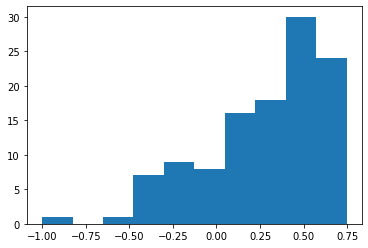

In [102]:
plt.hist(emoji_ranking['sentiment_score'])